In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# np.random.seed(seed=100) # seed 설정
x1=np.random.uniform(0,3,100) # 하나하나 100번을 해야하나 한번에 100번일까
x2=np.random.uniform(2,4,100)
x3=np.random.uniform(-2,2,100)
x4_1=np.random.triangular(-2,2,100)
x4=(1/3)*x3+(2/3)*x4_1
# e=np.random.normal(0,0.5,100)

In [ ]:
def f(x1,x2,x3,x4):
    y=-x1+2*x2-0.5*((1/np.sqrt(2))*x3+(1/np.sqrt(2))*x4-(1/np.sqrt(2)))**2+6 # +np.random.normal(0,0.5,100)
    return y

In [ ]:
yhat=f(x1,x2,x3,x4)
yhat

array([-168.9623808 , -181.29393017, -164.01068759, -166.52348377,
       -164.68851264, -189.56395435, -151.69679648, -142.48877204,
       -165.07377448, -143.24709673, -182.31186782, -154.76475233,
       -161.54008789, -154.53680341, -164.60075565, -144.66582111,
       -173.00803794, -164.58296312, -184.58711105, -145.06409428,
       -138.05168986, -202.43749871, -184.37595423, -156.71136585,
       -175.58019248, -185.24089212, -146.82780689, -149.49449937,
       -186.41102251, -144.61851962, -202.67572404, -203.5994396 ,
       -204.65490633, -165.23105062, -166.71788962, -200.87290855,
       -194.80276536, -151.80729263, -190.53610194, -143.46416931,
       -186.35300516, -139.26759966, -140.60322121, -161.03234298,
       -163.21201469, -185.12004451, -200.54524111, -164.5138659 ,
       -158.59354597, -149.45006299, -206.12560633, -176.42738811,
       -149.33914852, -139.39010874, -155.72109068, -185.16657404,
       -175.57385155, -151.33368854, -141.52895666, -186.26298

In [ ]:
# 개별로 데이터 불러오는게 맞는듯
x1=np.random.uniform(0,3) # 하나하나 100번을 해야하나 한번에 100번일까
x2=np.random.uniform(2,4)
x3=np.random.uniform(-2,2)
x4_1=np.random.triangular(-2,0,2) # mode는 모르는데?
x4=(1/3)*x3+(2/3)*x4_1
e=np.random.normal(0,0.5)
y=-x1+2*x2-0.5*((1/np.sqrt(2))*x3+(1/np.sqrt(2))*x4-(1/np.sqrt(2)))**2+6+e
y

9.08162295393372

In [ ]:
def mse(n,y,haty): # mse 정의 해 놓기
    mse=sum((y-haty)**2)/n
    return mse

In [ ]:
def qtriang(p,min,mode,max,log_p,mean):
    if len([p])==0:
        return 0
    if type(min)==int:
        lout=1
    if type(min)!=int:
        lout=max(len(low),len(high)) # 이거 정의가 문제
    min=np.repeat(low, lout, axis=0)
    mode=np.repeat(mode,lout,axis=0)
    max=np.repeat(high,lout,axis=0)

    quel=p<=(mode-low)/(max-high)
    q= min+np.sqrt(p*(mode-low)*(high-low)) if quel else max-np.sqrt((1-p)*(high-low)*(high-mode))
    minmodemax=(abs(low-high)<(1.490116e-08))
    q=min if minmodemax else q
    return q


In [ ]:
def rtriang(n,low,mode,hight,mean): # mc2d에 있는 rtriang function
    if len([n])>1 :
        n=len(n)
    if (len([n])==0) | (int(n)==0):
        return 0
    n=int(n)
    u=np.random.uniform(n)
    q=qtriang(u, min=np.repeat(low,n),
              mode=np.repeat(mode,n),
              max=np.repeat(high,n),log_p=False,mean=0)
    return q

In [ ]:
from random import random, uniform
def random_triangular(low, high, mode):
    while True:
        proposal = uniform(low, high)
        if proposal < mode:
            acceptance_prob = (proposal - low) / (mode - low)
        else:
            acceptance_prob = (high - proposal) / (high - mode)
        if random() < acceptance_prob: break
    return proposal

(array([ 200.,  621.,  967., 1372., 1740., 1779., 1430., 1041.,  598.,
         252.]),
 array([-1.9835582 , -1.58885574, -1.19415329, -0.79945084, -0.40474838,
        -0.01004593,  0.38465653,  0.77935898,  1.17406144,  1.56876389,
         1.96346635]),
 <a list of 10 Patch objects>)

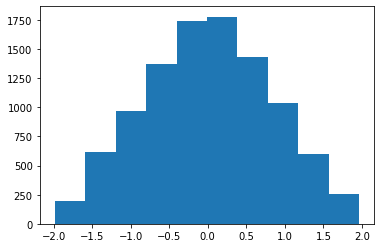

In [ ]:
import pylab
pylab.hist([random_triangular(-2, 2, 0) for t in range(10000)])

In [ ]:
x1=np.array([np.random.uniform(0,3) for t in range(100)]) # 하나하나 100번을 해야하나 한번에 100번일까
x2=np.array([np.random.uniform(2,4) for t in range(100)])
x3=np.array([np.random.uniform(-2,2) for t in range(100)])
x4_1=np.array([random_triangular(-2, 2, 0) for t in range(100)])
x4=x3/3+(2/3)*x4_1
e=np.array([np.random.normal(0,0.5) for t in range(100)])
y=-x1+2*x2-0.5*((1/np.sqrt(2))*x3+(1/np.sqrt(2))*x4-(1/np.sqrt(2)))**2+6+e

train=pd.DataFrame(np.transpose([x1,x2,x3,x4,y]), columns=['x1', 'x2', 'x3','x4','y'])

In [ ]:
x1=np.array([np.random.uniform(0,3) for t in range(100)]) # 하나하나 100번을 해야하나 한번에 100번일까
x2=np.array([np.random.uniform(2,4) for t in range(100)])
x3=np.array([np.random.uniform(-2,2) for t in range(100)])
x4_1=np.array([random_triangular(-2, 2, 0) for t in range(100)])
x4=x3/3+(2/3)*x4_1
e=np.array([np.random.normal(0,0.5) for t in range(100)])
y=-x1+2*x2-0.5*((1/np.sqrt(2))*x3+(1/np.sqrt(2))*x4-(1/np.sqrt(2)))**2+6+e

test=pd.DataFrame(np.transpose([x1,x2,x3,x4,y]), columns=['x1', 'x2', 'x3','x4','y'])

In [ ]:
train_x=train.iloc[:,:4]
train_y=train.iloc[:,4]
test_x=test.iloc[:,:4]
test_y=test.iloc[:,4]
train_x

,x1,x2,x3,x4
0,1.124867,3.429439,1.673624,0.344662
1,2.699125,3.604998,1.031989,-0.940731
2,2.936785,3.514046,1.905091,0.398629
3,0.675382,3.603501,-1.621051,-0.800344
4,2.647154,2.308964,-0.950623,0.117474
...,...,...,...,...
95,2.991285,2.952638,-0.548994,0.429180
96,1.877613,3.466710,1.568909,0.490963
97,1.653352,2.021709,0.807513,0.298188
98,2.084597,3.503267,0.951554,-0.019444


In [ ]:
test.head()

,x1,x2,x3,x4,y
0,2.897267,3.034145,-0.168000,-0.056829,9.715317
1,1.543444,2.121036,-0.963606,-0.360111,6.949997
2,0.378474,3.819863,0.991486,-0.153813,13.375657
3,0.017639,2.767638,1.287597,0.318619,10.524294
4,1.019598,3.733791,-1.434580,-0.111556,11.169777


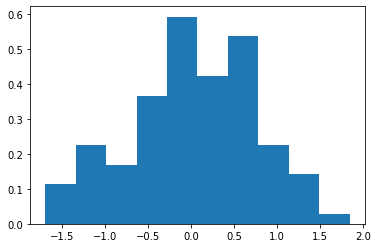

In [ ]:
# 그냥 이렇게 뽑을 수도 있긴 함

import matplotlib.pyplot as plt
plt.hist(np.random.triangular(-2,0,2,100),density=True)
plt.show() # r에서는 일단 기준이 0이 되는데 mode를 내가 시뮬을 통해서 얻어내야 하는 건가????

In [ ]:
# 모델 초기화
initializer =tf.keras.initializers.GlorotNormal() # 사비에르 초기화
# tf.keras.layers.Dense(10,activationn='maxihat',kernel_initializer=initializer)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K

In [ ]:
reg=tf.keras.wrappers.scikit_learn.KerasRegressor(model) # 파라미터 지정하지 않았으므로 내부에 있는 기본값 사용 # 사비에르 쓰면 얘가 빠지네

In [ ]:
def wavelet(x):
    return -x * K.exp(-0.5 * x**2)



In [ ]:
tf.keras.utils.get_custom_objects().update({'wavelet': Activation(wavelet)})

In [ ]:
def model(n_hidden=3, n_neurons=3, learning_rate=0.001): # 여기 acivation 도 수정 가능??????
    model=tf.keras.models.Sequential()
    tf.keras.layers.Flatten()
    # model.add(tf.keras.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        # model.add(tf.keras.layers.Dense(n_neurons,kernel_initializer=initializer,activation="wavelet")) # 안에 넣어도 될것
        model.add(tf.keras.layers.Dense(n_neurons,activation="wavelet"))
    model.add(tf.keras.layers.Dense(1))
    optimizer=tf.keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

In [ ]:
wnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='wavelet'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='linear') # 여기서 히든 수를 추가 하거나 등등
])

optimiser=tf.keras.optimizers.Adam()
wnn_model.compile(optimizer=optimiser, loss='mse', metrics=['mse','mae'])

In [ ]:
# 하이퍼 파라미터 랜덤 탐색
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={
    'n_hidden':[0,1,2,3,4,5,6,7,8,9,10],
    'n_neurons':np.arange(1,100),
    'learning_rate':reciprocal(3e-4,3e-2)
}

In [ ]:
train_x

,x1,x2,x3,x4
0,1.124867,3.429439,1.673624,0.344662
1,2.699125,3.604998,1.031989,-0.940731
2,2.936785,3.514046,1.905091,0.398629
3,0.675382,3.603501,-1.621051,-0.800344
4,2.647154,2.308964,-0.950623,0.117474
...,...,...,...,...
95,2.991285,2.952638,-0.548994,0.429180
96,1.877613,3.466710,1.568909,0.490963
97,1.653352,2.021709,0.807513,0.298188
98,2.084597,3.503267,0.951554,-0.019444


In [ ]:
rnd_search_cv=RandomizedSearchCV(reg,param,n_iter=10,cv=3)
# rnd_search_cv=RandomizedSearchCV(model,param,n_iter=10,cv=3) # model을 바로 사용할 수는 없는건가요????

rnd_search_cv.fit(train_x,train_y,epochs=100) # callback을 사용할건가 자네

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 106.0233
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 91.5487
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 80.2379
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 70.4032
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 64.7341
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 59.3273
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 55.1828
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 51.4472
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 48.1171
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 45.3123
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 42.9069
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 40.3532
Epoch 13/100
3/3 [==============================

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 91.5499
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 85.7556
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 80.4888
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 75.9589
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 71.9460
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 68.2316
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 64.8811
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 61.6684
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 58.7043
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 55.8726
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 53.2543
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 50.7490
Epoch 13/100
3/3 [==============================] - 0s 5ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 91.4330
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 86.6120
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 81.3361
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 76.3874
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 71.7596
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 67.3331
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 63.1913
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 59.3688
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 55.9870
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 52.8873
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 49.9963
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 47.2130
Epoch 13/100
3/3 [==============================] - 0s 4ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 70.0090
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 22.8582
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 8.4121
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 4.4077
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 2.0581
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7622
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5743
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 1.4228
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 1.1582
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0704
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9875
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9219
Epoch 13/100
3/3 [==============================] - 0s 3ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 76.7837
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 27.4337
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 10.7875
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 5.4470
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 3.2167
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 2.2945
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 1.8899
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7810
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6817
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5753
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 1.4698
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3909
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 72.2963
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 25.7323
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 9.6049
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 3.5895
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 2.2646
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1.9098
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1.8166
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6485
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5343
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4444
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 1.3865
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3185
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 73.4630
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 20.7494
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 7.5212
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 4.0506
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 3.4291
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 2.9461
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 2.7657
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3312
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 2.1077
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.8557
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7135
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 2.9665
Epoch 13/100
3/3 [==============================] - 0s 4ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 66.8964
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 20.9788
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 7.7815
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 3.7494
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 2.6545
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 2.3926
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 2.2014
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 2.0451
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 2.2178
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 1.7645
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6755
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4676
Epoch 13/100
3/3 [==============================] - 0s 4ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 66.4122
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 18.3643
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 8.1254
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 4.0543
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 2.6983
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 2.4526
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0992
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7241
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1.4756
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3365
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2087
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0162
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 6ms/step - loss: 96.4207
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 90.5524
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 85.0708
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 80.0833
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 75.1119
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 70.7149
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 66.8035
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 63.2692
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 60.0688
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 57.1487
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 54.5196
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 52.0282
Epoch 13/100
3/3 [==============================] - 0s 5ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 3ms/step - loss: 97.6737
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 86.1640
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 78.6062
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 72.7849
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 68.6782
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 65.2260
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 62.3698
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 59.8067
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 57.5806
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 55.6089
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 53.5951
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 51.8357
Epoch 13/100
3/3 [==============================] - 0s 3ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 4ms/step - loss: 90.7776
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 87.8886
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 85.1589
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 82.4408
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 79.9710
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 77.7849
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 75.4480
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 73.3069
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 71.1924
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 69.2479
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 67.3434
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 65.6395
Epoch 13/100
3/3 [==============================] - 0s 5ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 79.9271
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 55.4764
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 41.4894
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 30.8676
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 23.8931
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 18.7072
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 14.3261
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 11.2069
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 8.7045
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 7.5552
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 6.5794
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 5.8410
Epoch 13/100
3/3 [==============================] - 0s 3ms/step -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 6ms/step - loss: 89.1294
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 59.9891
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 44.1672
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 33.6934
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 25.1109
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 19.0361
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 14.4456
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 11.3248
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 8.6844
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 7.0196
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 5.7118
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 4.5854
Epoch 13/100
3/3 [==============================] - 0s 8ms/step -

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 81.7630
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 56.8790
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 41.5368
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 30.6842
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 22.9825
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 17.1826
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 12.6747
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 9.8892
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9764
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 6.4163
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 5.1251
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 4.3942
Epoch 13/100
3/3 [==============================] - 0s 7ms/step - 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 53.9229
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 4.6111
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 2.4732
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7819
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 5.3072
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 2.1808
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0309
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 1.4094
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 4.0128
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9997
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 4.1211
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7053
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 8ms/step - loss: 51.9821
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 4.0647
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 3.5516
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.8761
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 2.9008
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 8.5528
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 2.9111
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 2.9318
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5134
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 1.1622
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3838
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8943
Epoch 13/100
3/3 [==============================] - 0s 8ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 55.0752
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 2.9325
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 4.4390
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 3.2291
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1.6155
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 4.2359
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.6197
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 3.8936
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 1.8443
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 2.9487
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 1.3644
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1.2618
Epoch 13/100
3/3 [==============================] - 0s 3ms/step - loss: 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 83.1537
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 29.4133
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 23.0789
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 7.2626
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 3.0894
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.8962
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 1.3765
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 6.3882
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.5217
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 1.3945
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9732
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.5738
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 78.1244
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 32.4547
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 11.4218
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 4.1602
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 2.0683
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 1.3698
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0247
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9995
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9228
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 2.6643
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 1.3952
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0754
Epoch 13/100
3/3 [==============================] - 0s 3ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 68.6842
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 20.4942
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 7.7696
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 4.0304
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1650
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5060
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 1.2095
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8740
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9729
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.1510
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 1.9721
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7691
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 8ms/step - loss: 89.6732
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 64.6935
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 46.9094
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 34.9319
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 27.3085
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 20.5614
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 16.7758
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 13.7580
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 11.2038
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 9.6199
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2733
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 7.2250
Epoch 13/100
3/3 [==============================] - 0s 8ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 86.6283
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 63.2713
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 47.3214
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 36.8760
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 29.2475
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 22.9112
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 18.5638
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 14.9839
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 12.0996
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 9.6762
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 7.6645
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 6.4785
Epoch 13/100
3/3 [==============================] - 0s 5ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 78.9982
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 58.9807
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 45.5621
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 35.1991
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 27.1047
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 21.0370
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 16.1750
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 12.6105
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 10.2041
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 8.2648
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 6.8089
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 5.7611
Epoch 13/100
3/3 [==============================] - 0s 7ms/step 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 1s 5ms/step - loss: 88.7228
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 38.4486
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 19.9206
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 10.9501
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 8.4725
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 5.3970
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 4.3646
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 3.8525
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 3.5210
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 3.4084
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 3.0529
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 2.8919
Epoch 13/100
3/3 [==============================] - 0s 3ms/step - los

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 77.1860
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 34.1770
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 17.5660
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 9.4764
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 5.6923
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 4.2524
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 3.0761
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 2.5484
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 2.3792
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 2.2652
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 2.0268
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.8753
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 7ms/step - loss: 78.3786
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 33.7283
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 16.0738
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 8.4988
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 4.9946
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 3.5509
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 2.8101
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 2.4775
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1.9401
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6892
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 1.7557
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2830
Epoch 13/100
3/3 [==============================] - 0s 5ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 3ms/step - loss: 95.2406
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 82.2606
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 71.3230
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 62.4377
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 54.9801
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 47.5673
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 42.1966
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 36.2663
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 31.7463
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 27.7451
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 24.5990
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 21.7116
Epoch 13/100
3/3 [==============================] - 0s 6ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 5ms/step - loss: 91.7124
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 80.3162
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 69.8958
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 60.5443
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 52.6021
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 45.9760
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 39.8397
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 34.8430
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 30.6120
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 26.6872
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 23.2517
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 20.4232
Epoch 13/100
3/3 [==============================] - 0s 3ms/st

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


3/3 [==============================] - 0s 6ms/step - loss: 120.8439
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 107.0968
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 94.7802
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 83.8755
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 73.7660
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 64.4303
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 57.3301
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 50.9052
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 45.2348
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 39.6848
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 35.4905
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 31.8441
Epoch 13/100
3/3 [==============================] - 0s 4ms/

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


4/4 [==============================] - 0s 3ms/step - loss: 69.8585
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 19.6561
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 6.0010
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 3.1371
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 2.3951
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1664
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9239
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7421
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6227
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.5241
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.3762
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2995
Epoch 13/100
4/4 [==============================] - 0s 5ms/step - loss:

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f33c0b8d990>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f33c4ff20d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_s

In [ ]:
# 최적의 파라미터
rnd_search_cv.best_params_



{'learning_rate': 0.003661481193997134, 'n_hidden': 1, 'n_neurons': 86}

-0.40398069222768146

In [ ]:
# 배치 정규화
# 신경망에 첫 번째 층으로 배치 정규화를 추가하면 훈련 세트를 표준화할 필요가 없다.
# 층 중간중간 tf.keras.layers.BatchNormalization() # 결과보고 알아서 선택하면 될 듯
mode=tf.keras.models.Sequential([
                                 tf.keras.layers.Flatten(input_shape=[,]),
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Dense(10,kernel_initizlizer='he_normal',use_bias=False)
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Activation('elu'),
                                 tf.keras.layers.Dense(10,kernel_initizlizer='he_normal',use_bias=False)
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Activation('elu'),
                                 tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

    # 폰트 설정
    # font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    # matplotlib.rc('font', family=font_name)
    # 도화지 생성
    fig = plt.figure()
    # 정확도 그래프 그리기
    plt.plot(range(epochs), history['mse'], label='mse', color='darkred')
    # 축 이름
    plt.xlabel('epochs')
    # plt.ylabel('검증 정확도(%)')
    # plt.title('epoch에 따른 검증 데이터에 대한 정확도 그래프')
    plt.grid(linestyle='--', color='lavender')
    # 그래프 표시
    plt.show()
